In [1]:
import pandas as pd

# Load raw dataset
df = pd.read_csv("notices.csv")
df.head()


,Notice Identifier,Notice Type,Organisation Name,Status,Published Date,Title,Description,Nationwide,Postcode,Region,...,Value High,Awarded Date,Awarded Value,Supplier [Name|Address|Ref type|Ref Number|Is SME|Is VCSE],Supplier's contact name,Contract start date,Contract end date,OJEU Procedure Type,Accelerated Justification,Closing Time
0,CF-0495600D8d000003VQwdEAG,PreProcurement,DEFRA,Closed,2025-05-16T16:58:30+01:00,Geospatial Enabling Programme Delivery Partner,Defra requires a delivery partner to help it d...,NaN,SW1P 3JR,Any region,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
1,tender_477689/1443690,Contract,The Legal Aid Agency,Closed,2025-06-26T10:28:50+01:00,Procurement of Civil Legal Advice services fro...,"The Legal Aid Agency (""LAA"") is inviting Appli...",NaN,SW1H 9AJ,"North East,North West,Yorkshire and The Humber...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OpenOJEU,NaN,17:00
2,BIP640294191,Contract,Chelmsford City Council,Closed,2021-11-08T10:40:03Z,Chelmsford City Council Building Services DPS,Text to be corrected in the original notice:\r...,NaN,NaN,East of England,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restricted,NaN,17:00
3,BIP961551554,Contract,BIP SOLUTIONS LIMITED,Closed,2025-06-25T12:58:11+01:00,Hampshire Schools Cluster 6 - Catering Service...,Hampshire Schools Cluster 6 are seeking Cateri...,NaN,NaN,South East,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RestrictedOJEU,NaN,00:00
4,RA351800,Contract,Chichester College Group,Closed,2025-06-25T12:01:31+01:00,RA351800 - Chichester College- Composites equi...,Chichester College Composites equipment as per...,NaN,PO19 1SB,Any region,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Open,NaN,17:30


In [3]:
# Keep rows with both Value Low and Value High present
df = df.dropna(subset=["Value Low", "Value High"])

# Convert to numeric and remove scientific notation
df["Value High"] = pd.to_numeric(df["Value High"], errors="coerce").astype(float)
df["Value Low"] = pd.to_numeric(df["Value Low"], errors="coerce").astype(float)

# Convert to integers for readability
df["Value High"] = df["Value High"].astype(int)
df["Value Low"] = df["Value Low"].astype(int)


In [4]:
# Take Low as estimated, High as final
df["estimated_cost"] = df["Value Low"]
df["final_cost"] = df["Value High"]
df["overshot"] = (df["final_cost"] > df["estimated_cost"]).astype(int)


In [5]:
# Keep useful columns
df_cleaned = df[[
    "Title", "Description", "Region", "Organisation Name",
    "estimated_cost", "final_cost", "overshot"
]]

# Show basic info
df_cleaned.info()
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, 4 to 994
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              589 non-null    object
 1   Description        588 non-null    object
 2   Region             550 non-null    object
 3   Organisation Name  589 non-null    object
 4   estimated_cost     589 non-null    int32 
 5   final_cost         589 non-null    int32 
 6   overshot           589 non-null    int32 
dtypes: int32(3), object(4)
memory usage: 29.9+ KB


,Title,Description,Region,Organisation Name,estimated_cost,final_cost,overshot
4,RA351800 - Chichester College- Composites equi...,Chichester College Composites equipment as per...,Any region,Chichester College Group,0,0,0
5,CWC23084 Task 3 - Reedham Gardens via Framewor...,Construction of seventeen new build properties...,West Midlands,Wolverhampton City Council,4677312,4677312,0
7,Arboricultural services - Tree works operations,13545 ESTATE AD-HOC 120425 300525\r\nAd hoc tr...,United Kingdom,London Borough Of Islington,0,0,0
9,RA351688 - Peer-Supported Open Dialogue Traine...,The project scope involves conducting the gene...,Any region,North East London NHS Foundation Trust,0,0,0
10,RA351685 - Peer-Supported Open Dialogue Traine...,The delivery of the Open Dialogue training as ...,Any region,North East London NHS Foundation Trust,0,0,0


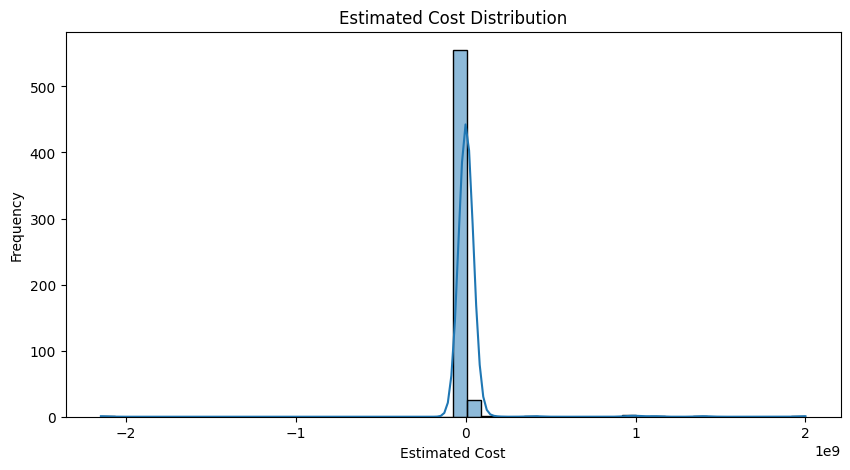

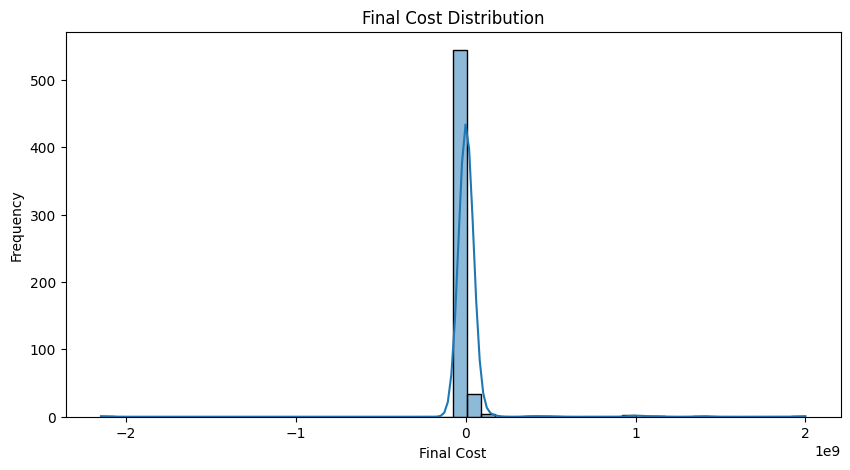

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["estimated_cost"], bins=50, kde=True)
plt.title("Estimated Cost Distribution")
plt.xlabel("Estimated Cost")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["final_cost"], bins=50, kde=True)
plt.title("Final Cost Distribution")
plt.xlabel("Final Cost")
plt.ylabel("Frequency")
plt.show()


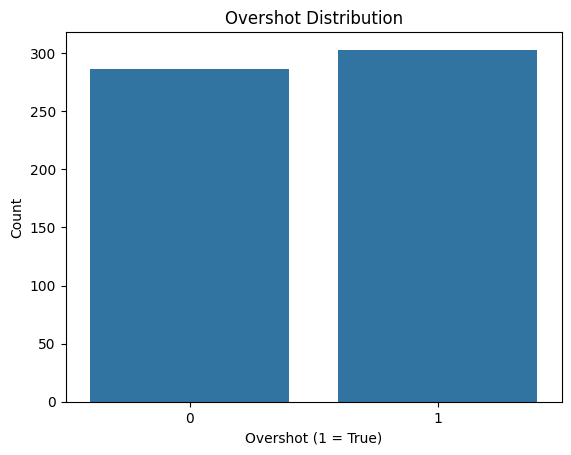

In [7]:
sns.countplot(x="overshot", data=df_cleaned)
plt.title("Overshot Distribution")
plt.xlabel("Overshot (1 = True)")
plt.ylabel("Count")
plt.show()


In [8]:
df_cleaned["Region"].value_counts().head(10)

Region
Any region                                                                                                                 199
England                                                                                                                     64
United Kingdom                                                                                                              56
East of England                                                                                                             32
London                                                                                                                      31
Yorkshire and The Humber                                                                                                    21
West Midlands                                                                                                               17
North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South 

In [9]:
df_cleaned["Organisation Name"].value_counts().head(10)

Organisation Name
AMEY DEFENCE SERVICES LIMITED                    21
Anthro JV                                        15
Sizewell C Limited                               14
Shropshire Healthcare Procurement Service        13
Newry, Mourne and Down District Council (NMD)    11
Leicester City Council                           10
City of Wolverhampton College                     8
Balfour Beatty VINCI JV HS2                       8
EU SUPPLY LIMITED                                 7
Oil and Pipelines Agency                          7
Name: count, dtype: int64

In [11]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 165.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/299.9 kB 281.8 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/299.9 kB 787.7 kB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.5 MB/s eta 0:00:00


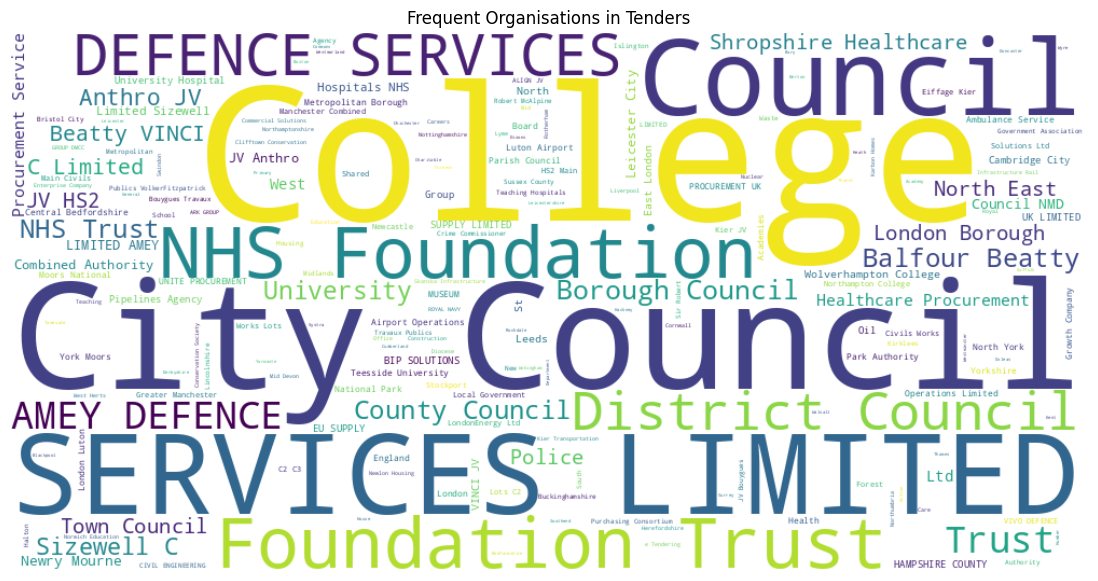

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

org_text = " ".join(df_cleaned["Organisation Name"].dropna().astype(str))

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(org_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Frequent Organisations in Tenders")
plt.show()


C:\Users\viswa\AppData\Local\Temp\ipykernel_824\3584205782.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette="viridis")


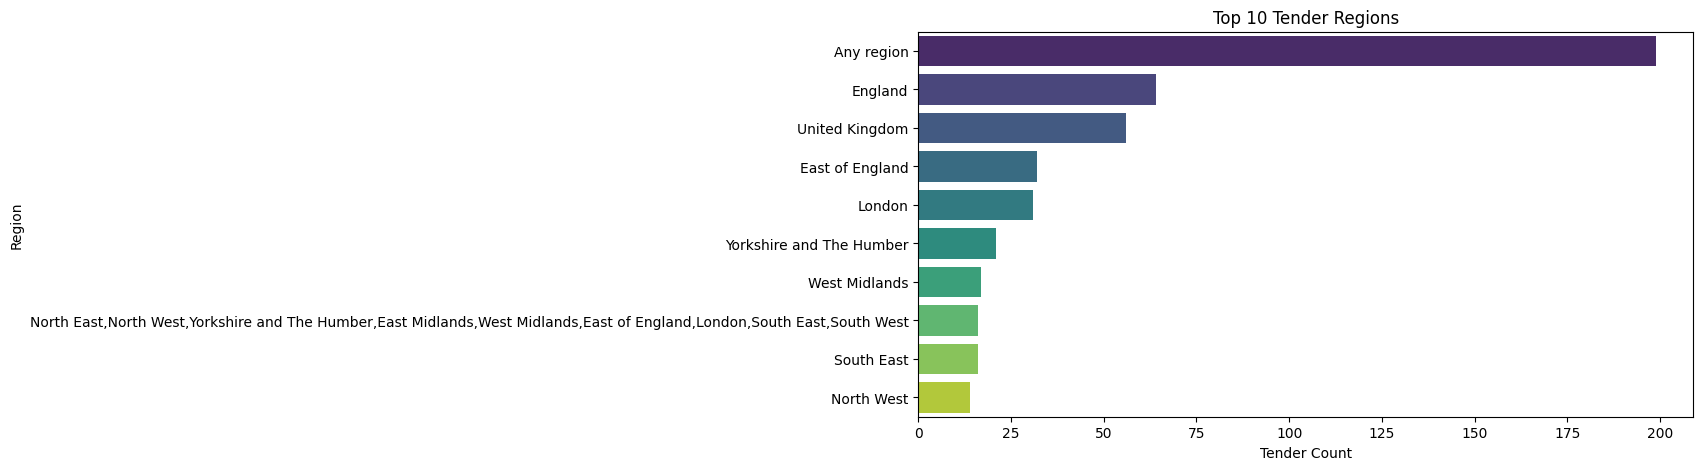

In [14]:
import seaborn as sns

region_counts = df_cleaned["Region"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=region_counts.values, y=region_counts.index, palette="viridis")
plt.title("Top 10 Tender Regions")
plt.xlabel("Tender Count")
plt.ylabel("Region")
plt.show()


In [16]:
df_cleaned.to_csv("C:/nmlops/tender-overshoot-mlops/data/processed/tenders_labeled.csv", index=False)